In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
% cd /content/drive/My Drive/Colab Notebooks/chinese-ocr

/content/drive/My Drive/Colab Notebooks/chinese-ocr


In [0]:
%tensorflow_version 1.x
#import tensorflow as tf
#!pip3 install torch torchvision

In [4]:
## tf.reset_default_graph()
import time
from glob import glob
from IPython.display import Image as display
import numpy as np
from PIL import Image

import model
paths = glob('./test/*.*')





Tensor("Placeholder:0", shape=(?, ?, ?, 3), dtype=float32)



Tensor("conv5_3/conv5_3:0", shape=(?, ?, ?, 512), dtype=float32)
Tensor("rpn_conv/3x3/rpn_conv/3x3:0", shape=(?, ?, ?, 512), dtype=float32)
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.Bidirectional(keras.layers.RNN(cell))`, which is equivalent to this API
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instruct

Using TensorFlow backend.


In [5]:
paths = glob('./test/*.*')
sorted(paths)

['./test/image01.jpg',
 './test/image01g.jpg',
 './test/image02.jpg',
 './test/image02g.jpg',
 './test/image03.jpg',
 './test/image03g.jpg',
 './test/image04.jpg',
 './test/image04g.jpg',
 './test/image05.jpg',
 './test/image05g.jpg']

## OCR

Detection took 3.915s for 51 object proposals
write to csv
Mission complete, it takes 5.777651309967041s
---------------------------------------
The literal orientation of the image is 0 degrees
Recognition Result:

暨墅模-诊所
够断-明苦
-诊断文骁:鲁字00000006珑
》姓名
，啵--
性别
清年眙39威
民圆68年09月21日生
出生地
肯住址-高雄市三民匪德北街1跳1模
0-蒙爵科
感--自民圈108年04月03日
科别
〉NO-000001
病雁虢
，日期至民圈108年04月08日
减E119
l9:Type2diabetesmellituswithoutcomplications
)
|110
:Essential(primary)hypertension
|E85
:Hyperlipidemia,umspecified
.E119
19:Type2diabetesmellituswithoutcomplications
:Essential(primary)hypertension
名-B785
.:yperlipidemia,umspecified
[119
:Typediabetesmellituswithoutcomplications
|110
:Kssential-primary)hypertension
.E785
:Hyperlipidemia,umspecified
-病患於民团107年01月03日至民圆108年04月03日止共逃行31欢阴诊(107/01/03-01729、01/31,兵
1
，2/01，02/09,03/12,04/11，05/07，05/21，05/26-06/08、0625,07/00。08/03-08/20.傻
.00/28,10/18、10/2，10/23-11/6-1/%12/13,1224，1/28、108/0121,108/2/2,、断
，108/03/09、108/03/09,108/03/19,108/03/30,108/04/08)及德健治寐共逃行4攻(107/2/10,-
|02

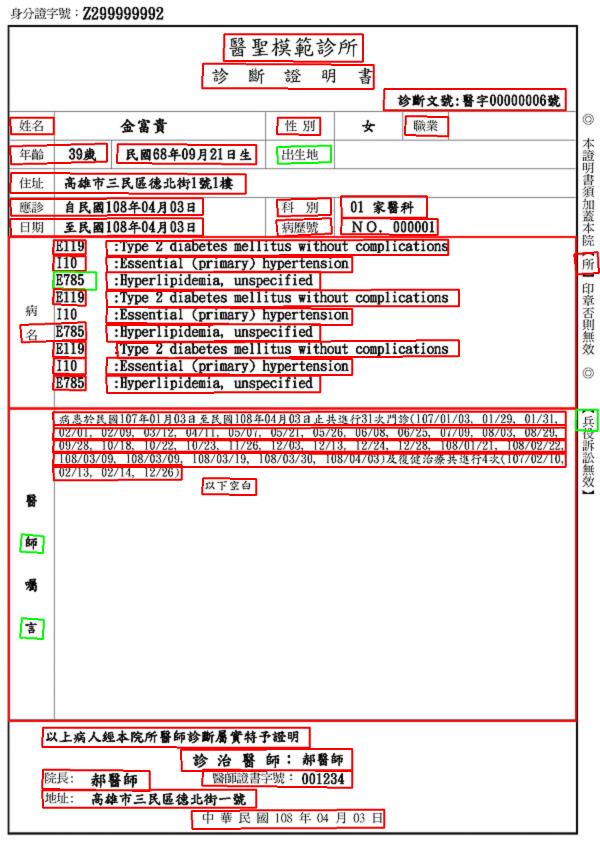

In [7]:
imgPath = sorted(paths)[0]
imgName = imgPath.split('/')[-1][:-4]
img = Image.open(imgPath)

img = np.array(img.convert('RGB'))
#img = np.array(img.convert('RGB'))
t = time.time()
result, img, angle = model.model(img,imgName, model_type='pytorch_crnn', adjust=True, angle_detect=False)

print("Mission complete, it takes {}s".format(time.time() - t)) 
print("---------------------------------------")
print("The literal orientation of the image is {} degrees".format(angle))
print("Recognition Result:\n")

for key in result:
    print(result[key][1])

Image.fromarray(img)